## Data Understanding
### Loading necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import sys
import inspect
import numpy as np

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [24]:
tweets = pd.read_csv('../data/cleaned_economic_data.csv')
tweets.head()

,created_at,source,original_text,retweet_text,sentiment,polarity,subjectivity,lang,statuses_count,favorite_count,retweet_count,screen_name,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,2022-04-22 22:17:05+00:00,Twitter for Android,RT @NorthstarCharts: The 10-year yield is tell...,year yield telling us theres high risk somethi...,1.0,0.16,0.540000,en,281.0,188.0,43.0,davideiacovozzi,58634.0,55.0,NaN,gold,NorthstarCharts,NaN
1,2022-04-22 13:44:53+00:00,Twitter for Android,RT @MichaelAArouet: German 10y mortgage rate w...,german y mortgage rate went hear sound german ...,1.0,0.15,0.175000,en,281.0,179.0,32.0,davideiacovozzi,40980.0,55.0,NaN,NaN,MichaelAArouet,NaN
2,2022-04-22 06:10:34+00:00,Twitter for Android,RT @goldseek: When? https://t.co/kO2FfHKaZg,NaN,-1.0,0.00,0.000000,en,281.0,193.0,26.0,davideiacovozzi,37461.0,55.0,False,NaN,goldseek,NaN
3,2022-04-21 17:22:09+00:00,Twitter for Android,RT @charliebilello: The 30-year mortgage rate ...,year mortgage rate us rises highest level sinc...,-1.0,0.00,0.066667,en,281.0,620.0,213.0,davideiacovozzi,383561.0,55.0,NaN,NaN,charliebilello,NaN
4,2022-04-21 10:32:26+00:00,Twitter for Android,RT @biancoresearch: Rates rise until something...,rates rise something breaks anything broken yet,0.0,-0.40,0.400000,en,281.0,1787.0,417.0,davideiacovozzi,182570.0,55.0,False,NaN,biancoresearch,NaN


# Exploring the Data

In [25]:
#To get information about the data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          8220 non-null   object 
 1   source              8220 non-null   object 
 2   original_text       8220 non-null   object 
 3   retweet_text        8209 non-null   object 
 4   sentiment           8220 non-null   float64
 5   polarity            8220 non-null   float64
 6   subjectivity        8220 non-null   float64
 7   lang                8220 non-null   object 
 8   statuses_count      8220 non-null   float64
 9   favorite_count      8220 non-null   float64
 10  retweet_count       8220 non-null   float64
 11  screen_name         8220 non-null   object 
 12  followers_count     8220 non-null   float64
 13  friends_count       8220 non-null   float64
 14  possibly_sensitive  1549 non-null   object 
 15  hashtags            2474 non-null   object 
 16  user_m

In [26]:
tweets.shape

(8220, 18)

In [27]:
print("The number of missing value(s) based on columns:\n{}".format(tweets.isnull().sum()))
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columns having missing value(s):{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s) based on columns:
created_at               0
source                   0
original_text            0
retweet_text            11
sentiment                0
polarity                 0
subjectivity             0
lang                     0
statuses_count           0
favorite_count           0
retweet_count            0
screen_name              0
followers_count          0
friends_count            0
possibly_sensitive    6671
hashtags              5746
user_mentions            2
location              3419
dtype: int64
The number of missing value(s): 15849
Columns having missing value(s):Index(['retweet_text', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'location'],
      dtype='object')


# Data Preparation

In [28]:
import sys
import os

In [29]:
sys.path.append(os.path.abspath(os.path.join('../fix_bug')))

In [30]:
from clean_tweets_dataframe import CleanTweets

In [31]:
tweets_df = pd.DataFrame(columns=['retweet_text', 'sentiment', 'hashtags', 'lang'])

tweets_df['sentiment'] =  tweets['sentiment'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()
tweets_df['hashtags'] = tweets['hashtags'].to_list()
tweets_df['retweet_text'] = tweets['retweet_text'].to_list()

tweets_df.head()

,retweet_text,sentiment,hashtags,lang
0,year yield telling us theres high risk somethi...,1.0,gold,en
1,german y mortgage rate went hear sound german ...,1.0,NaN,en
2,NaN,-1.0,NaN,en
3,year mortgage rate us rises highest level sinc...,-1.0,NaN,en
4,rates rise something breaks anything broken yet,0.0,NaN,en


In [32]:
tweets_df.dropna(subset=['retweet_text'], inplace=True)
tweets_df.reset_index(drop=True, inplace=True)

In [33]:
tweets_df.head()

,retweet_text,sentiment,hashtags,lang
0,year yield telling us theres high risk somethi...,1.0,gold,en
1,german y mortgage rate went hear sound german ...,1.0,NaN,en
2,year mortgage rate us rises highest level sinc...,-1.0,NaN,en
3,rates rise something breaks anything broken yet,0.0,NaN,en
4,buying opportunities like occur every years bonds,0.0,bonds,en


In [34]:
tweets_df = tweets_df.fillna("")
tweets_df.head()

,retweet_text,sentiment,hashtags,lang
0,year yield telling us theres high risk somethi...,1.0,gold,en
1,german y mortgage rate went hear sound german ...,1.0,,en
2,year mortgage rate us rises highest level sinc...,-1.0,,en
3,rates rise something breaks anything broken yet,0.0,,en
4,buying opportunities like occur every years bonds,0.0,bonds,en


In [35]:
tweets_df['retweet_text'] =  tweets_df['retweet_text'].astype(str)
tweets_df['retweet_text']= tweets_df['retweet_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
tweets_df['sentiment'] =  tweets_df['sentiment'].astype(int)
tweets_df['hashtags'] = tweets_df['hashtags'].astype(str)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.lower())
tweets_df['hashtags']= tweets_df['hashtags'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [36]:
tweets_df.drop(tweets_df[tweets_df['sentiment'] == -1].index, inplace=True)
tweets_df.reset_index(drop=True, inplace=True)

In [37]:
flattened_words_df = pd.DataFrame(
    [word for words_list in tweets_df['retweet_text']
    for word in words_list.split(' ')],
    columns=['word'])

flattened_words_df.head()

,word
0,year
1,yield
2,telling
3,us
4,theres


<AxesSubplot:>

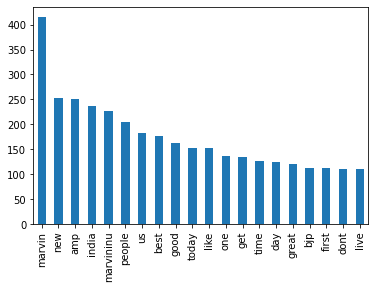

In [38]:
flattened_words_df['word'].value_counts()[:20].plot(kind='bar')

In [39]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in tweets_df.hashtags
    for hashtag in hashtags_list.split(',')],
    columns=['hashtag'])

flattened_hashtags_df.drop(flattened_hashtags_df[flattened_hashtags_df['hashtag'] == ""].index, inplace=True)
flattened_hashtags_df.reset_index(drop=True, inplace=True)
flattened_hashtags_df.head()

,hashtag
0,gold
1,bonds
2,ecb
3,deflation
4,russellnapiers


<AxesSubplot:>

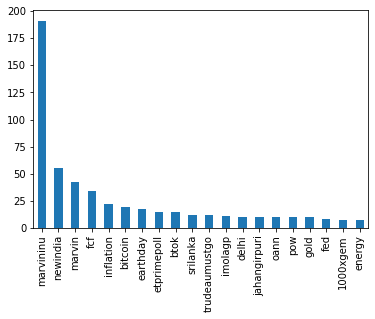

In [40]:
flattened_hashtags_df.hashtag.value_counts()[:20].plot(kind='bar')

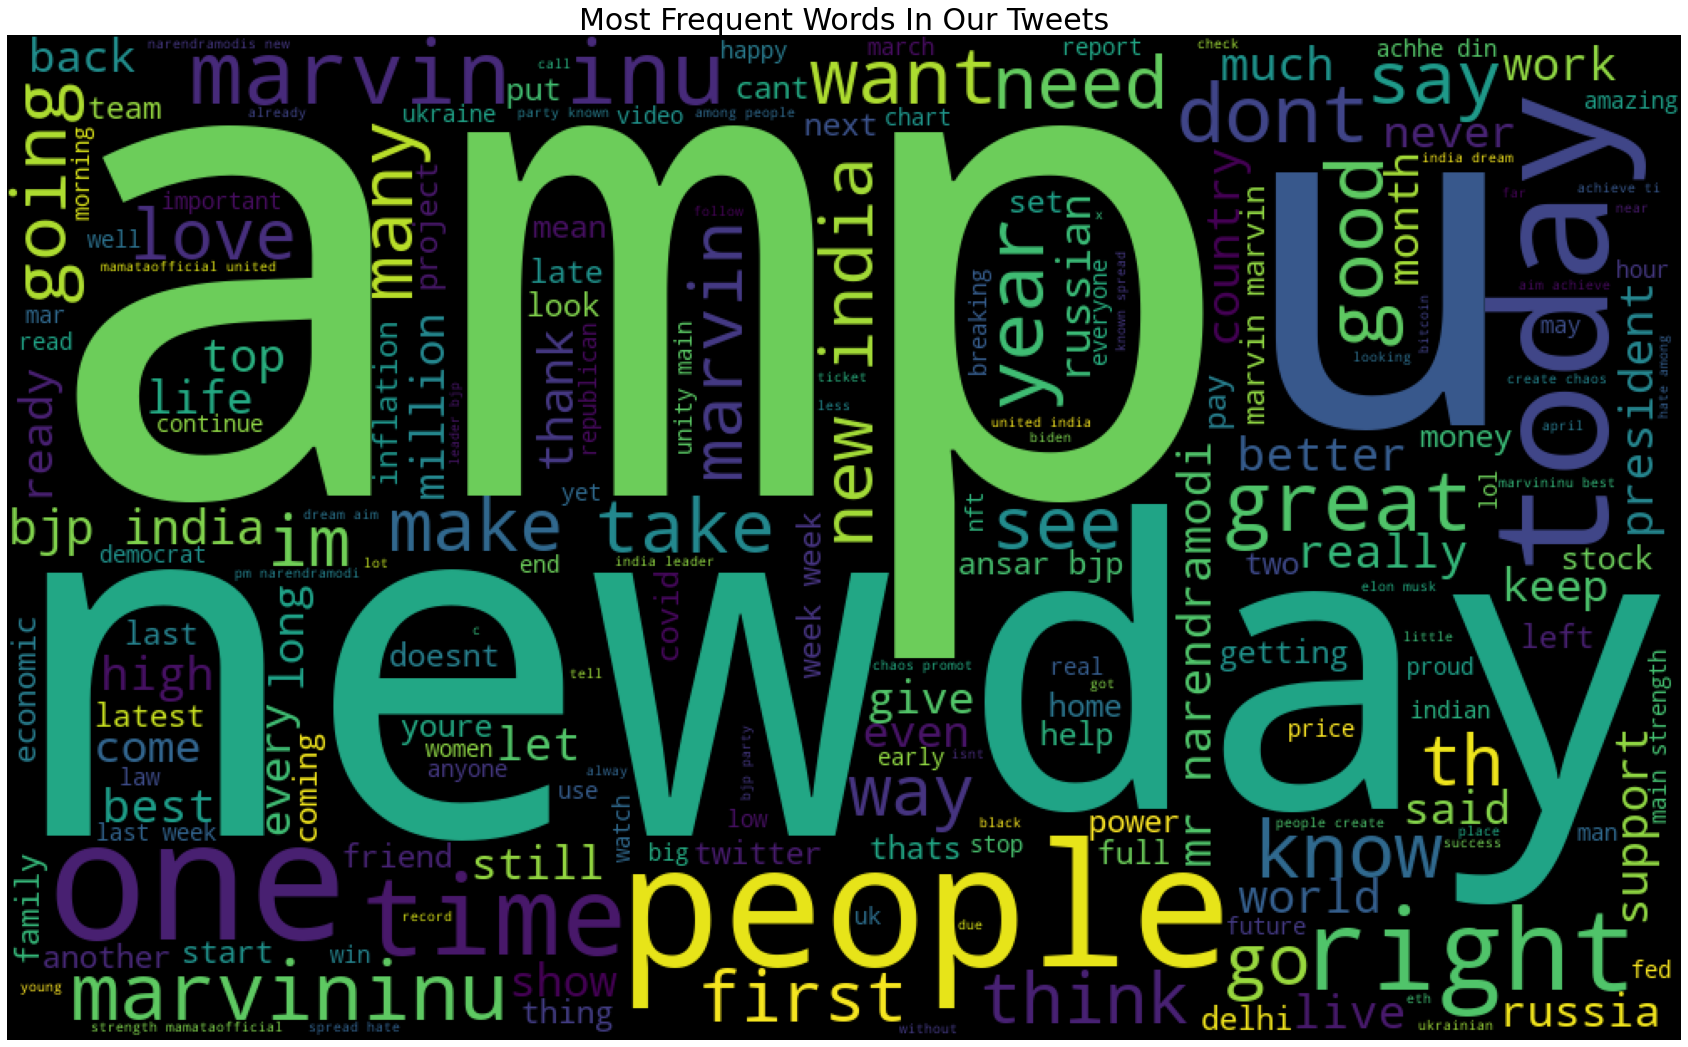

In [41]:
plt.figure(figsize=(30, 20))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_df['retweet_text'].values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=30)
plt.show()

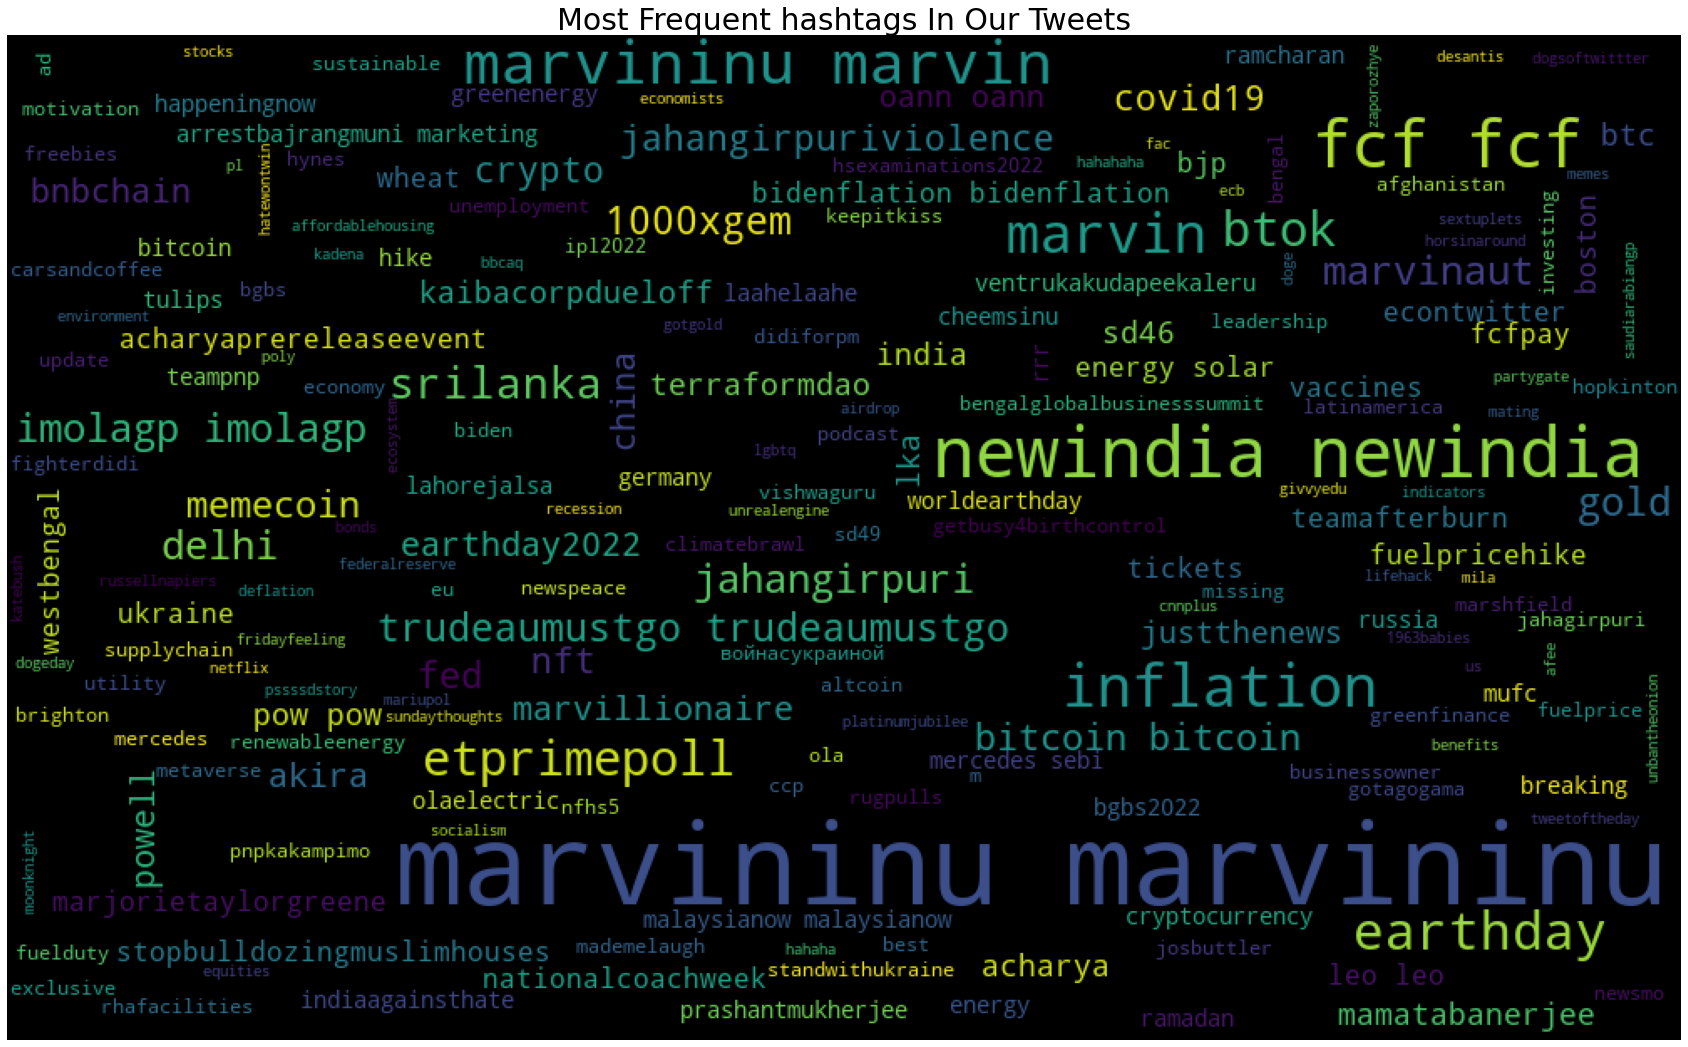

In [42]:
plt.figure(figsize=(30, 20))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_df['hashtags'].values)))
plt.axis('off')
plt.title('Most Frequent hashtags In Our Tweets',fontsize=30)
plt.show()

In [44]:
tweets_df.to_csv('../data/model_ready_data.csv', index=False)
print('Model Ready Data Successfully Saved.!!!')

Model Ready Data Successfully Saved.!!!
